# Import libraries

In [51]:
import pandas as pd
from config import RAW_DIR, CLEAN_DIR, FIG_DATA_DIR
import numpy as np
import os
import matplotlib.pyplot as plt

In [52]:
raw_training = pd.read_csv(os.path.join(RAW_DIR, "raw_training.csv"), index_col=[0, 3])
raw_training2 = pd.read_csv(os.path.join(RAW_DIR, "raw_training2.csv"), index_col=[2, 0])
final_training = pd.read_csv(os.path.join(CLEAN_DIR, "metadata.csv"), index_col=[0, 1])

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_38303/898445117.py:1: DtypeWarning: Columns (10,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_training = pd.read_csv(os.path.join(RAW_DIR, "raw_training.csv"), index_col=[0, 3])


In [53]:
raw_training_concat = pd.concat([raw_training, raw_training2])

In [54]:
raw_training_concat.columns[:20]

Index(['Author (year)', 'BoiProject ID', 'RunID', 'Sequencing Platform',
       'Library layout (SE/PE)', 'Sample origin? (e.g., stool, mucosa)',
       'Disease status', 'Sample_ID', 'Subject Id (If available)',
       'Age (Years)', 'Gender', 'Geographical Region or Population',
       'BMI (kg/m²)', 'PHENOTYPE_Disease', 'PHENOTYPE:Healthy_Nonhealthy',
       'UNKNOWN', 'k__Archaea', 'k__Archaea|p__Euryarchaeota',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales'],
      dtype='object')

In [55]:
meta = raw_training_concat.loc[final_training.index][["Age (Years)", "Gender", "Geographical Region or Population", "BMI (kg/m²)"]]
meta

Age (Years)  Gender  \
Study_ID  Sample Accession                       
GMHI-10   SAMN03283239            13.0     NaN   
          SAMN03283266            32.0  Female   
          SAMN03283281            52.0  Female   
          SAMN03283294             4.0    Male   
          SAMN03283288            12.0    Male   
...                                ...     ...   
Yang_2020 SRR6456373               NaN     NaN   
          SRR6456374               NaN     NaN   
          SRR6456375               NaN     NaN   
          SRR6456376               NaN     NaN   
          SRR6456377               NaN     NaN   

                           Geographical Region or Population BMI (kg/m²)  
Study_ID  Sample Accession                                                
GMHI-10   SAMN03283239                                  Peru       18.77  
          SAMN03283266                                   USA        19.3  
          SAMN03283281                                  Peru       19.47  
          SAMN03283294                                  Peru       19.83  
          SAMN03283288                                  Peru       19.84  
...                                                      ...         ...  
Yang_2020 SRR6456373                                     NaN         NaN  
          SRR6456374                                     NaN         NaN  
          SRR6456375                                     NaN         NaN  
          SRR6456376                                     NaN         NaN  
          SRR6456377                                     NaN         NaN  

[8069 rows x 4 columns]

In [56]:
len(np.unique(meta.index.get_level_values(0)))

54

In [57]:
np.unique([str(g) for g in meta["Gender"]], return_counts=True)

(array(['-', 'F', 'Female', 'M', 'Male', 'female', 'male', 'nan'],
       dtype='<U6'),
 array([   1,  645,  348,  474,  619, 1590, 1343, 3049]))

In [58]:
sex = ["N/a" if not isinstance(g, str) else "Male" if g.lower()[0] == "m" else "Female" if g.lower()[0] == "f" else "N/a" for g in meta["Gender"]]
       
sex_labels, sex_counts = np.unique(sex, return_counts=True)
# sex_labels = [la + f" ({c})" for la, c in zip(sex_labels, sex_counts)]
sex_labels

array(['Female', 'Male', 'N/a'], dtype='<U6')

In [59]:
sex_df = pd.DataFrame(sex_counts).T
sex_df.columns = sex_labels
sex_df.index = ["count"]
sex_df

,Female,Male,N/a
count,2583,2436,3050


In [60]:
sex_df.to_csv(os.path.join(FIG_DATA_DIR, "1b_sex.csv"))

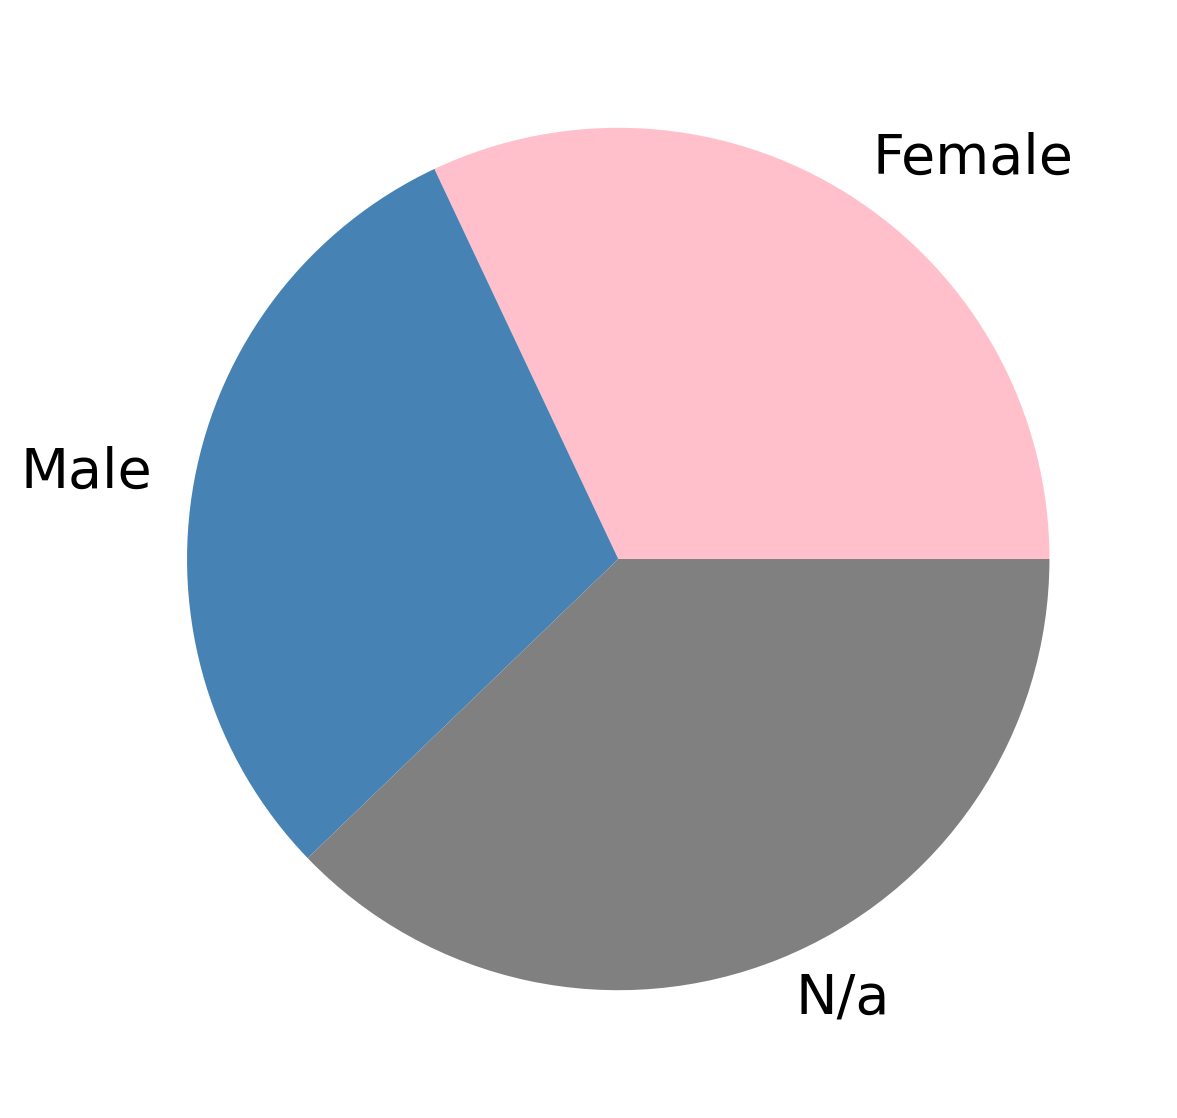

In [61]:
fig = plt.figure(figsize =(10, 7), dpi=200)

plt.pie(sex_counts, labels=sex_labels, textprops={'fontsize': 20}, colors=["pink", "steelblue", "gray"])

plt.show()

In [62]:
country_labels, country_counts = np.unique(["N/a" if not isinstance(g, str) else "Italy" if "Italy" in g else str(g) for g in meta["Geographical Region or Population"]], return_counts=True)


In [63]:
sum([count for label, count in zip(country_labels, country_counts) if label != "N/a"])

7647

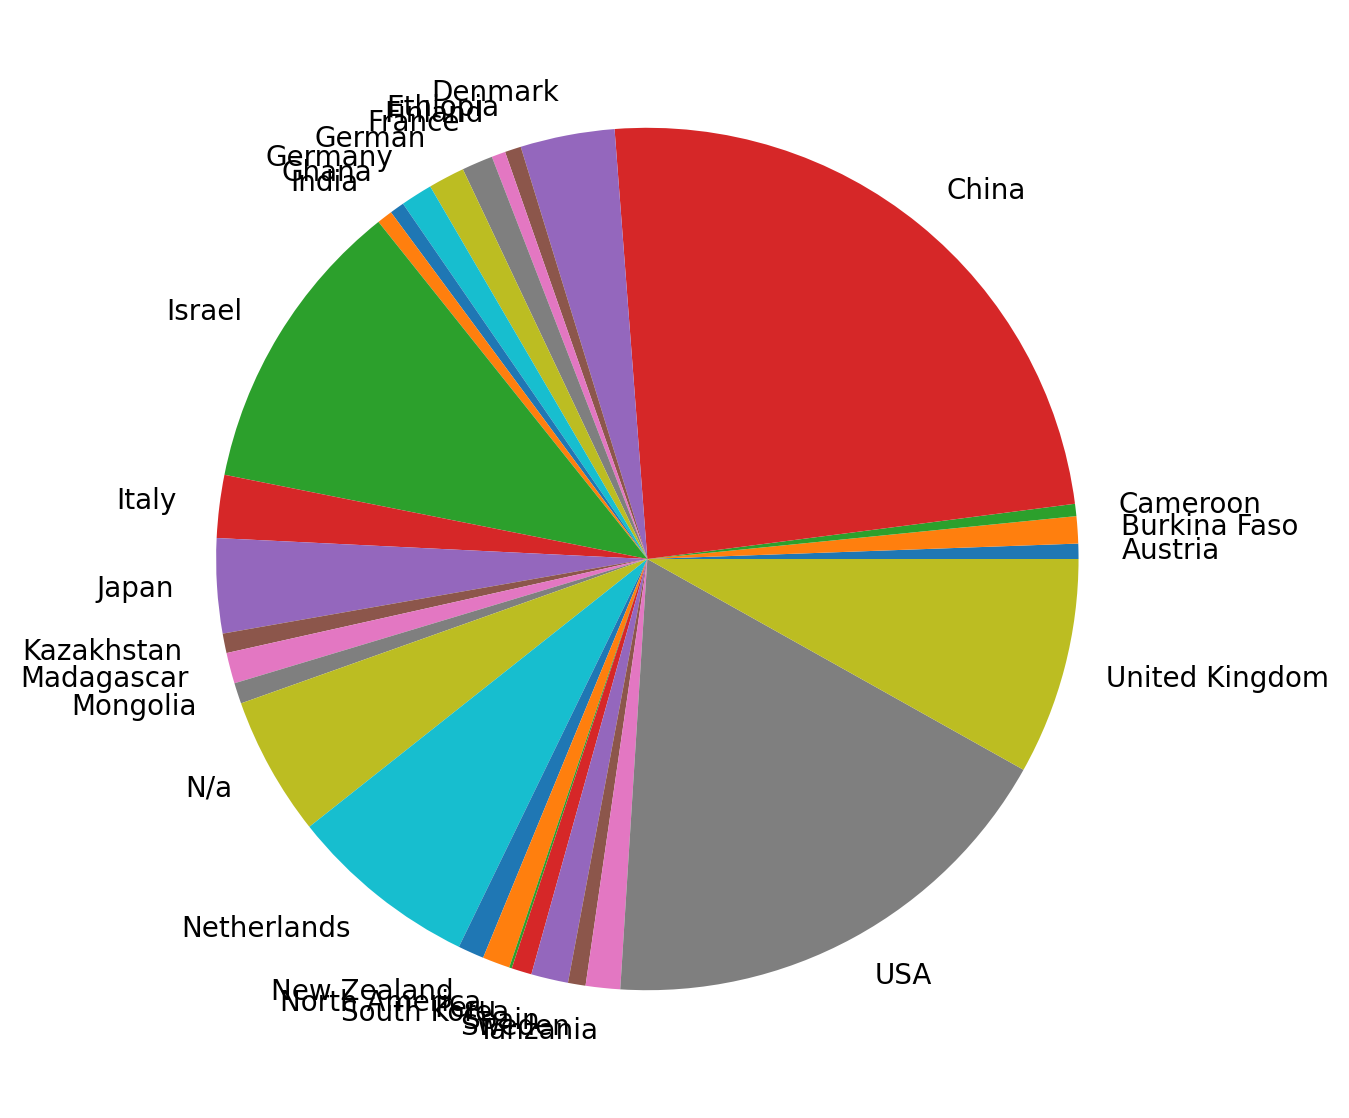

In [64]:
fig = plt.figure(figsize =(10, 7), dpi=200)

plt.pie(country_counts, labels=country_labels)

plt.show()

In [65]:
country_df = pd.DataFrame(country_counts).T
country_df.columns = country_labels
country_df.index = ["count"]
country_df

,Austria,Burkina Faso,Cameroon,China,Denmark,Ethiopia,Finland,France,German,Germany,...,Netherlands,New Zealand,North America,Peru,South Korea,Spain,Sweden,Tanzania,USA,United Kingdom
count,46,82,37,1950,285,49,42,94,110,96,...,576,79,83,8,61,112,53,104,1442,656


In [66]:
country_df.to_csv(os.path.join(FIG_DATA_DIR, "1b_country.csv"))

In [67]:
ages = [age for age in meta["Age (Years)"] if (isinstance(age, int) or isinstance(age, float)) and (not np.isnan(age))]
len(ages)

3686

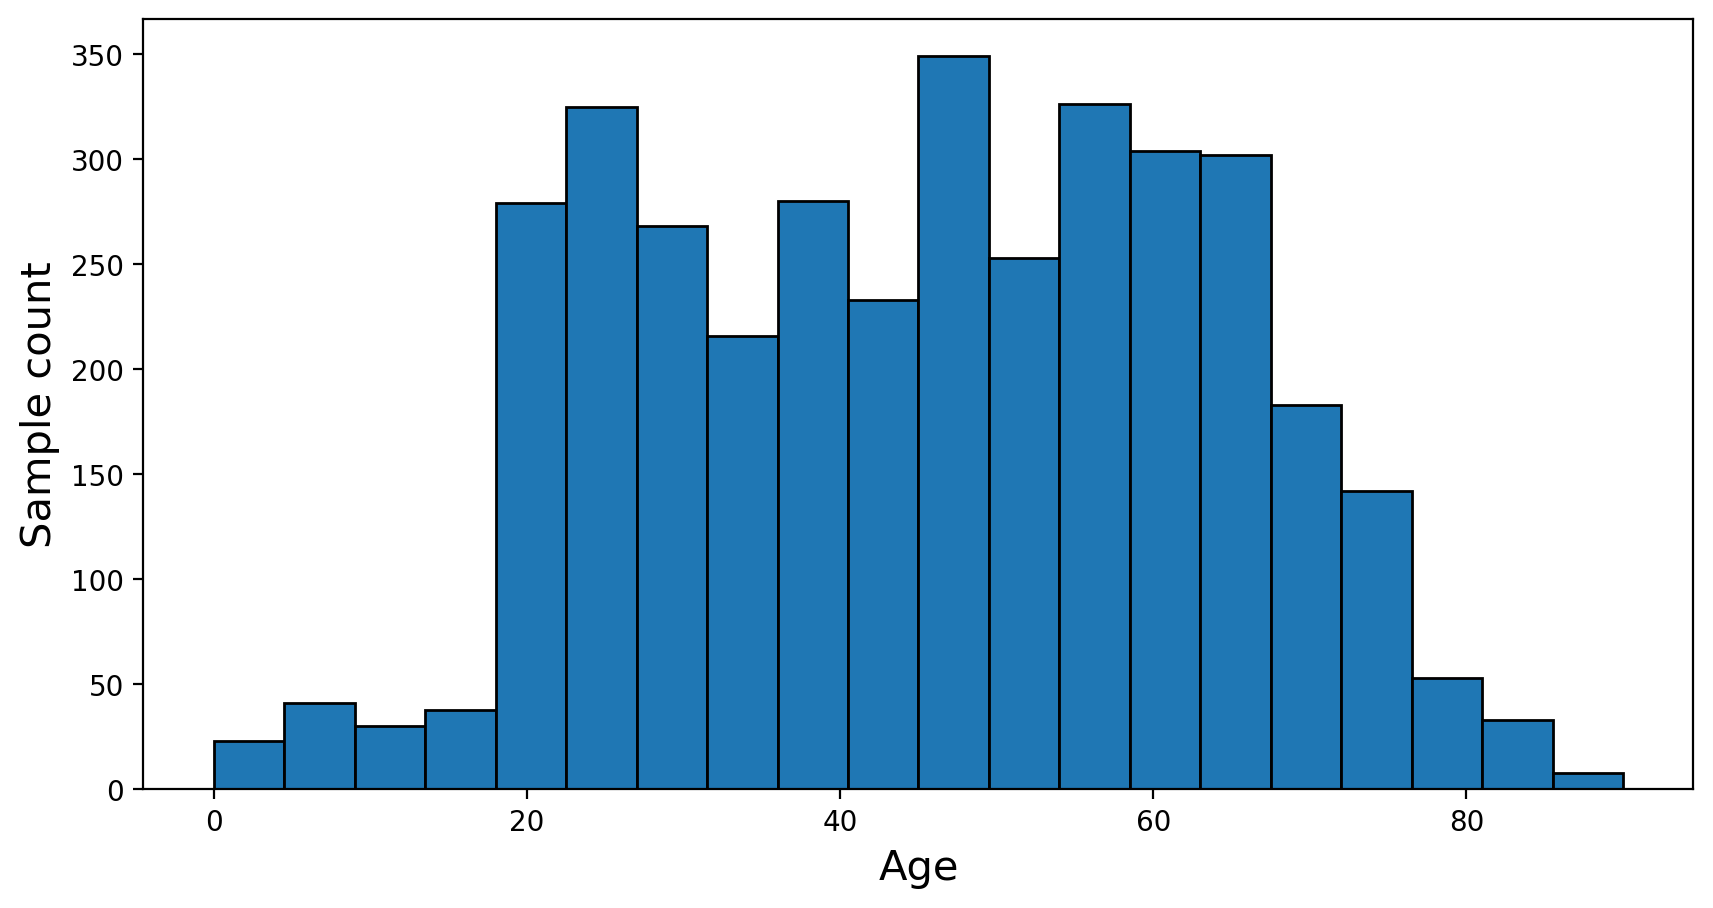

In [68]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(ages, bins=20, edgecolor="black")

plt.xlabel("Age", fontsize=15)
plt.ylabel("Sample count", fontsize=15)

plt.show()

In [73]:
pd.DataFrame(ages).to_csv(os.path.join(FIG_DATA_DIR, "1b_age.csv"), header=False, index=False)

In [70]:
bmi = [bmi for bmi in meta["BMI (kg/m²)"] if ((isinstance(bmi, int) or isinstance(bmi, float)) and (not np.isnan(bmi)) and 15 < bmi < 40)]
len(bmi)

2830

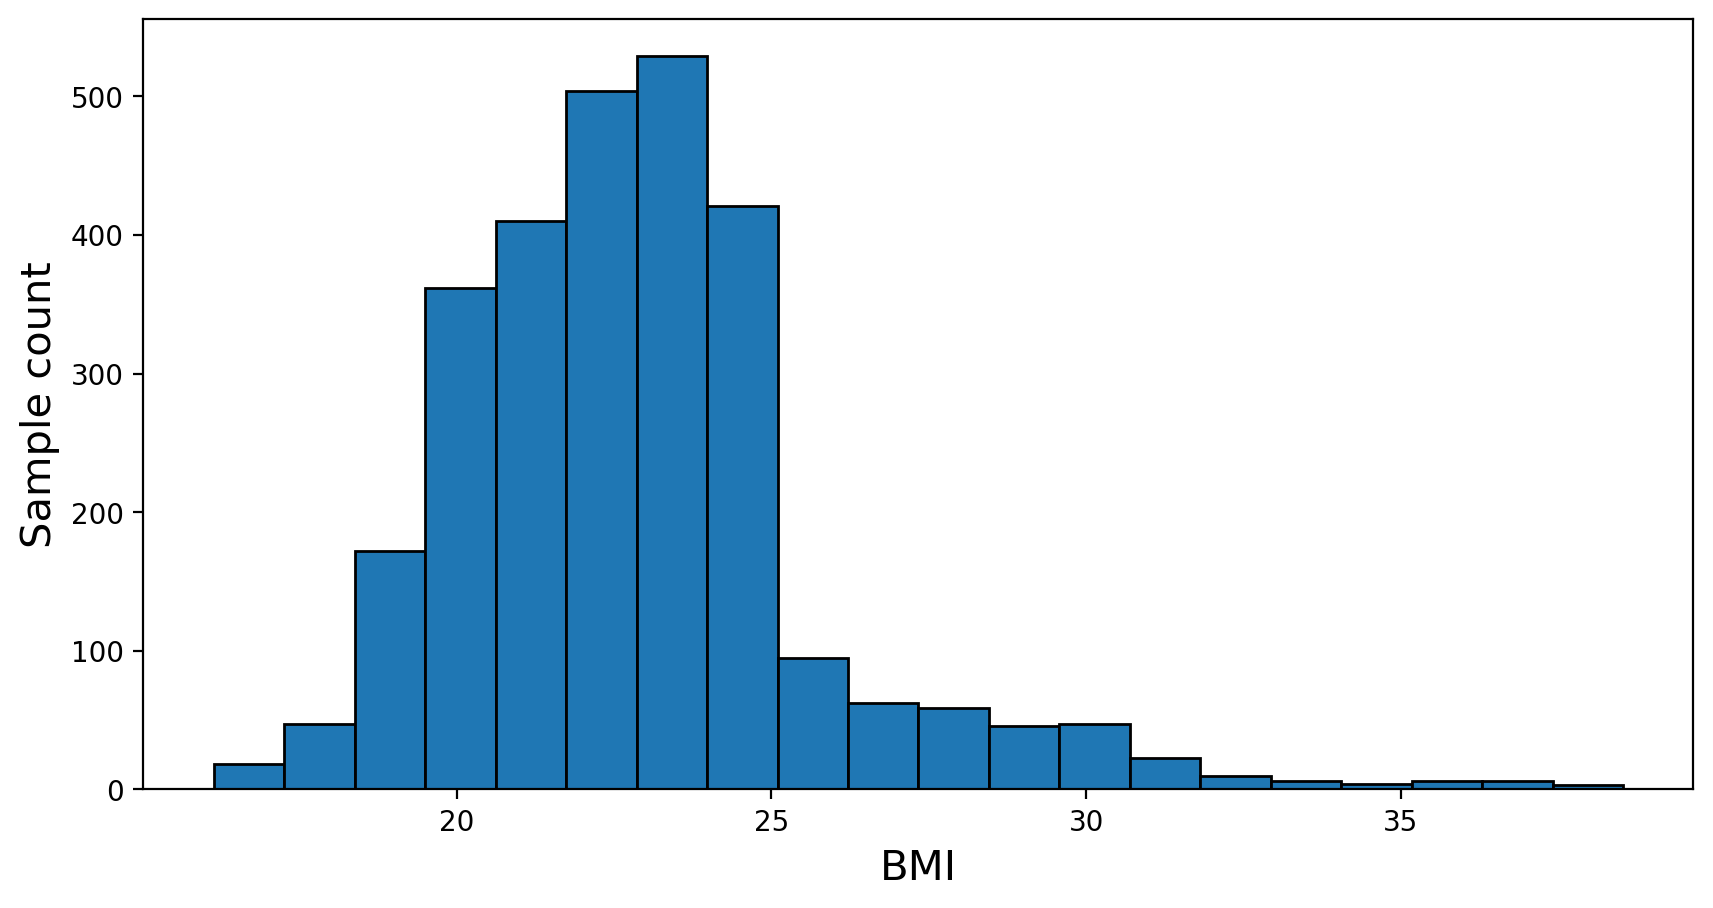

In [71]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(bmi, bins=20, edgecolor="black")

plt.xlabel("BMI", fontsize=15)
plt.ylabel("Sample count", fontsize=15)

plt.show()

In [72]:
pd.DataFrame(bmi).to_csv(os.path.join(FIG_DATA_DIR, "1b_bmi.csv"), header=False, index=False)